In [38]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

### Plot Points (Farm or Field Location)
### Say you have latitude and longitude of a farm:

In [13]:
# Example data: a farm with lat/lon
data = {'Name': ['My Farm'], 'Latitude': [37.7749], 'Longitude': [-122.4194]}
df = pd.DataFrame(data)

In [14]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
    crs="EPSG:4326"  # WGS 84
)

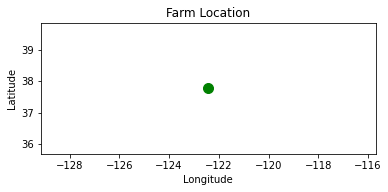

In [15]:
# Plot Output: A simple map with a green dot showing 
# the farm's location.
gdf.plot(marker='o', color='green', markersize=100)
plt.title("Farm Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

###  Plot Multiple Farm or Field Locations

In [16]:
# Example: multiple farms
data = {
    'Name': ['Farm A', 'Farm B', 'Farm C'],
    'Latitude': [34.05, 36.17, 35.22],
    'Longitude': [-118.25, -115.14, -111.65]
}
df = pd.DataFrame(data)

In [17]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")


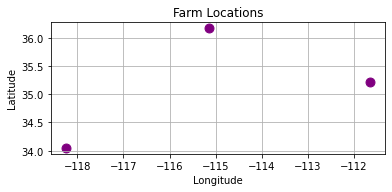

In [18]:
# Plot
gdf.plot(color='purple', markersize=80)
plt.title("Farm Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

### Plot a Map of the USA or Any Country


C:\Users\Mo\AppData\Local\Temp\ipykernel_10136\2151251391.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


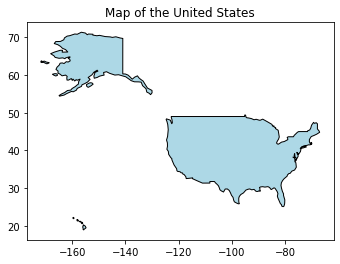

In [19]:
# Load the built-in world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for the USA
usa = world[world['name'] == 'United States of America']

# Plot USA
usa.plot(color='lightblue', edgecolor='black')
plt.title("Map of the United States")
plt.show()

In [20]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


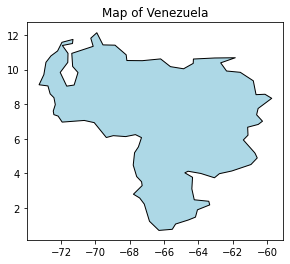

In [21]:
venezuela = world[world['name'] == 'Venezuela']

# Plot USA
venezuela.plot(color='lightblue', edgecolor='black')
plt.title("Map of Venezuela")
plt.show()

## Overlay Farm Locations on a State (e.g., California)

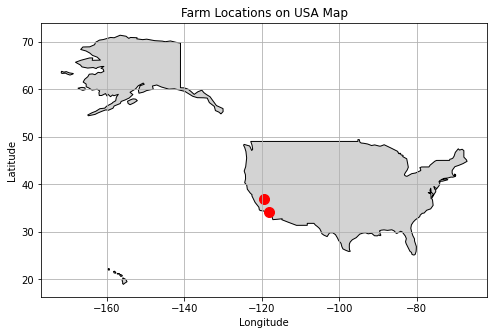

In [22]:
# Filter for California (approx bounding box or real shapefile preferred for accuracy)
usa = world[world['name'] == 'United States of America']

# Farm locations again
df = pd.DataFrame({
    'Name': ['Farm A', 'Farm B'],
    'Latitude': [36.7783, 34.0522],   # Coordinates in California
    'Longitude': [-119.4179, -118.2437]
})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")

# Plot USA and farm locations
ax = usa.plot(color='lightgray', edgecolor='black', figsize=(8, 6))
gdf.plot(ax=ax, color='red', markersize=100)
plt.title("Farm Locations on USA Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


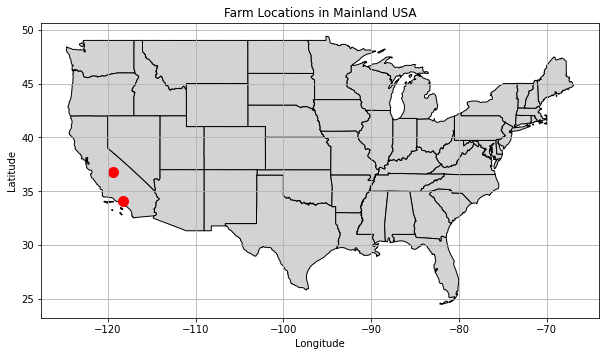

In [43]:
#us_states = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_state_20m.zip")
usa = world[world['name'] == 'United States of America']

# Filter only the continental states
exclude_states = ['Hawaii', 'Alaska', 'Puerto Rico']
mainland = us_states[~us_states['NAME'].isin(exclude_states)]

# Plot
ax = mainland.plot(color='lightgray', edgecolor='black', figsize=(10, 8))
gdf.plot(ax=ax, color='red', markersize=100)
plt.title("Farm Locations in Mainland USA")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

### Load and Plot US States or Counties

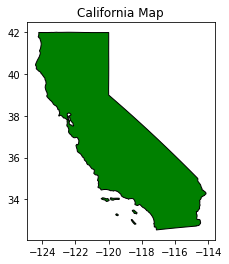

In [23]:
# Load a local shapefile (download from US Census if needed)
states = gpd.read_file("cb_2018_us_state_20m.shp")  # Change path if needed

# Filter for one state
california = states[states['NAME'] == 'California']

# Plot California
california.plot(color='green', edgecolor='black')
plt.title("California Map")
plt.show()


## Now we map our soil information on the state map

Sample Soil Data for Locations in California

In [24]:
from shapely.geometry import Point


In [25]:
# Create a DataFrame with soil samples
soil_data = pd.DataFrame({
    'Location': ['Site A', 'Site B', 'Site C', 'Site D'],
    'Latitude': [36.7783, 34.0522, 37.3382, 38.5816],   # California cities
    'Longitude': [-119.4179, -118.2437, -121.8863, -121.4944],
    'Clay_%': [30, 25, 40, 35],
    'Sand_%': [40, 50, 30, 40],
    'Silt_%': [30, 25, 30, 25],
    'OrganicMatter_%': [2.1, 3.5, 1.8, 2.7],
    'BulkDensity': [1.3, 1.2, 1.4, 1.35]
})

In [26]:
# Convert to GeoDataFrame
soil_gdf = gpd.GeoDataFrame(
    soil_data,
    geometry=gpd.points_from_xy(soil_data['Longitude'], soil_data['Latitude']),
    crs="EPSG:4326"
)

Load California Map

In [27]:
# Load built-in world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter USA and zoom to California
usa = world[world['name'] == 'United States of America']

# No shapefile? We'll just plot USA and zoom into California's area


C:\Users\Mo\AppData\Local\Temp\ipykernel_10136\3476903259.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Plot Organic Matter (%) on the Map
We'll color the points based on their Organic Matter (%):

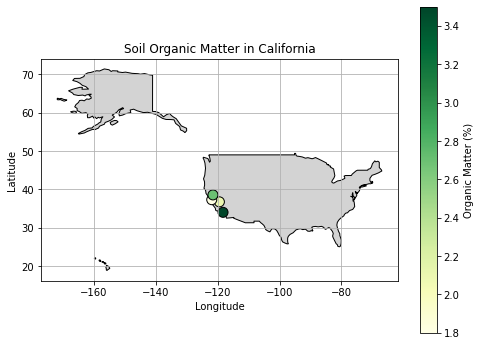

In [28]:
# Plot Organic Matter %
fig, ax = plt.subplots(figsize=(8, 6))

# Plot USA base
usa.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot soil points with Organic Matter % as color
soil_gdf.plot(
    ax=ax,
    column='OrganicMatter_%',
    cmap='YlGn',  # Yellow-Green color scale
    legend=True,
    legend_kwds={'label': "Organic Matter (%)"},
    markersize=100,
    edgecolor='black'
)

plt.title("Soil Organic Matter in California")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


Clay content

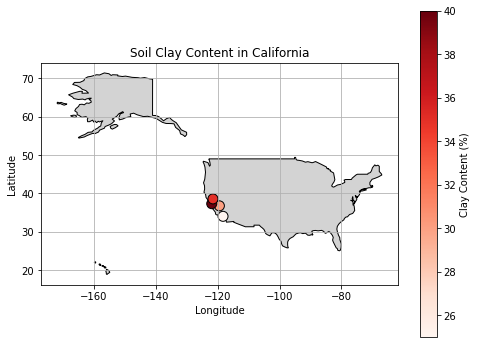

In [29]:
# Plot Clay %
fig, ax = plt.subplots(figsize=(8, 6))

usa.plot(ax=ax, color='lightgray', edgecolor='black')

soil_gdf.plot(
    ax=ax,
    column='Clay_%',
    cmap='Reds',  # Red scale
    legend=True,
    legend_kwds={'label': "Clay Content (%)"},
    markersize=100,
    edgecolor='black'
)

plt.title("Soil Clay Content in California")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [30]:
# Load the US states shapefile (adjust path if needed)
states = gpd.read_file("cb_2018_us_state_20m.shp")


In [31]:
# Filter for California only
california = states[states['NAME'] == 'California']

Create Sample Soil Data for California

In [32]:
# Create a DataFrame with soil samples
soil_data = pd.DataFrame({
    'Location': ['Site A', 'Site B', 'Site C', 'Site D'],
    'Latitude': [36.7783, 34.0522, 37.3382, 38.5816],   # Cities in California
    'Longitude': [-119.4179, -118.2437, -121.8863, -121.4944],
    'Clay_%': [30, 25, 40, 35],
    'Sand_%': [40, 50, 30, 40],
    'Silt_%': [30, 25, 30, 25],
    'OrganicMatter_%': [2.1, 3.5, 1.8, 2.7],
    'BulkDensity': [1.3, 1.2, 1.4, 1.35]
})

# Convert to GeoDataFrame
soil_gdf = gpd.GeoDataFrame(
    soil_data,
    geometry=gpd.points_from_xy(soil_data['Longitude'], soil_data['Latitude']),
    crs="EPSG:4326"
)


Plot Organic Matter % on California Map

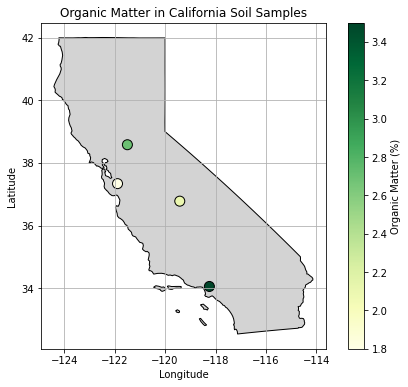

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot California shape
california.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot soil points with color based on organic matter
soil_gdf.plot(
    ax=ax,
    column='OrganicMatter_%',
    cmap='YlGn',
    legend=True,
    legend_kwds={'label': "Organic Matter (%)"},
    markersize=100,
    edgecolor='black'
)

plt.title("Organic Matter in California Soil Samples")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [34]:

from scipy.interpolate import griddata

In [35]:
# Your soil data
soil_data = pd.DataFrame({
    'Location': ['Site A', 'Site B', 'Site C', 'Site D'],
    'Latitude': [36.7783, 34.0522, 37.3382, 38.5816],
    'Longitude': [-119.4179, -118.2437, -121.8863, -121.4944],
    'Clay_%': [30, 25, 40, 35]
})

In [36]:
# Create GeoDataFrame
soil_gdf = gpd.GeoDataFrame(
    soil_data,
    geometry=gpd.points_from_xy(soil_data['Longitude'], soil_data['Latitude']),
    crs="EPSG:4326"
)

In [39]:
# Create a grid to interpolate onto, we use it as a canavas to draw on it
grid_lon = np.linspace(-123, -117, 200) # Creates 200 evenly spaced longitude values between -123 and -117.
grid_lat = np.linspace(33, 39, 200)
grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat) #np.meshgrid is a function from NumPy that takes two 1D arrays (like X and Y coordinates) 
#and creates two 2D grids — one for all X values and one for all Y values — so you can generate coordinate pairs over a grid.

In [40]:
# Interpolate using 'linear' (you can try 'cubic' or 'nearest')
grid_clay = griddata(
    (soil_gdf['Longitude'], soil_gdf['Latitude']),
    soil_gdf['Clay_%'],
    (grid_lon, grid_lat),
    method='linear'
)
#griddata(points, values, grid_points, method) estimates values (e.g., clay %) at new points by interpolating from known data.

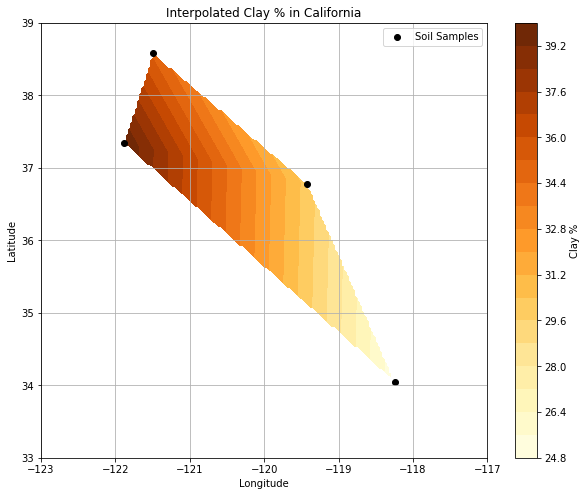

In [41]:
# Plot the result
plt.figure(figsize=(10, 8))
plt.contourf(grid_lon, grid_lat, grid_clay, cmap='YlOrBr', levels=20)
plt.colorbar(label='Clay %')

# Overlay sample locations
plt.scatter(soil_gdf['Longitude'], soil_gdf['Latitude'], color='black', marker='o', label='Soil Samples')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Interpolated Clay % in California')
plt.legend()
plt.grid(True)
plt.show()